In [1]:
import numpy as np
import pandas as pd

In [2]:
import matplotlib.pyplot as plt
import seaborn as sns
sns.set_style('whitegrid')
%matplotlib inline

In [3]:
df = pd.read_csv('911.csv')

In [4]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 99492 entries, 0 to 99491
Data columns (total 9 columns):
 #   Column     Non-Null Count  Dtype  
---  ------     --------------  -----  
 0   lat        99492 non-null  float64
 1   lng        99492 non-null  float64
 2   desc       99492 non-null  object 
 3   zip        86637 non-null  float64
 4   title      99492 non-null  object 
 5   timeStamp  99492 non-null  object 
 6   twp        99449 non-null  object 
 7   addr       98973 non-null  object 
 8   e          99492 non-null  int64  
dtypes: float64(3), int64(1), object(5)
memory usage: 4.9+ MB


In [5]:
df.head(3)

,lat,lng,desc,zip,title,timeStamp,twp,addr,e
0,40.297876,-75.581294,REINDEER CT & DEAD END; NEW HANOVER; Station ...,19525.0,EMS: BACK PAINS/INJURY,2015-12-10 17:40:00,NEW HANOVER,REINDEER CT & DEAD END,1
1,40.258061,-75.264680,BRIAR PATH & WHITEMARSH LN; HATFIELD TOWNSHIP...,19446.0,EMS: DIABETIC EMERGENCY,2015-12-10 17:40:00,HATFIELD TOWNSHIP,BRIAR PATH & WHITEMARSH LN,1
2,40.121182,-75.351975,HAWS AVE; NORRISTOWN; 2015-12-10 @ 14:39:21-St...,19401.0,Fire: GAS-ODOR/LEAK,2015-12-10 17:40:00,NORRISTOWN,HAWS AVE,1


In [6]:
df['zip'].value_counts().head(5)

19401.0    6979
19464.0    6643
19403.0    4854
19446.0    4748
19406.0    3174
Name: zip, dtype: int64

In [7]:
df['twp'].value_counts().head(5)

LOWER MERION    8443
ABINGTON        5977
NORRISTOWN      5890
UPPER MERION    5227
CHELTENHAM      4575
Name: twp, dtype: int64

In [8]:
df['title'].nunique()

110

In [9]:
df['Reason'] = df['title'].apply(lambda title: title.split(':')[0])

In [10]:
df['Reason'].value_counts()

EMS        48877
Traffic    35695
Fire       14920
Name: Reason, dtype: int64

<AxesSubplot:xlabel='Reason', ylabel='count'>

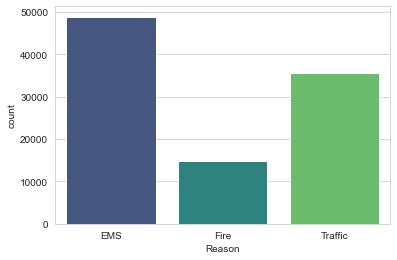

In [11]:
sns.countplot(x='Reason',data=df,palette='viridis')

In [12]:
type(df['timeStamp'].iloc[0])

str

In [13]:
df['timeStamp'] = pd.to_datetime(df['timeStamp'])

In [24]:
time = df['timeStamp'].iloc[0]

In [29]:
df['hour'] = df['timeStamp'].apply(lambda time : time.hour)
df['hour'].head()

0    17
1    17
2    17
3    17
4    17
Name: hour, dtype: int64

In [61]:
df['Month'] = df['timeStamp'].apply(lambda time : time.month)
df['Month'].head()

0    12
1    12
2    12
3    12
4    12
Name: Month, dtype: int64

In [62]:
df['Day of Week'] = df['timeStamp'].apply(lambda time: time.dayofweek)
df['Day of Week'].head()

0    3
1    3
2    3
3    3
4    3
Name: Day of Week, dtype: int64

In [63]:
df.head()

,lat,lng,desc,zip,title,timeStamp,twp,addr,e,Reason,hour,month,Day of Week,Month
0,40.297876,-75.581294,REINDEER CT & DEAD END; NEW HANOVER; Station ...,19525.0,EMS: BACK PAINS/INJURY,2015-12-10 17:40:00,NEW HANOVER,REINDEER CT & DEAD END,1,EMS,17,12,3,12
1,40.258061,-75.264680,BRIAR PATH & WHITEMARSH LN; HATFIELD TOWNSHIP...,19446.0,EMS: DIABETIC EMERGENCY,2015-12-10 17:40:00,HATFIELD TOWNSHIP,BRIAR PATH & WHITEMARSH LN,1,EMS,17,12,3,12
2,40.121182,-75.351975,HAWS AVE; NORRISTOWN; 2015-12-10 @ 14:39:21-St...,19401.0,Fire: GAS-ODOR/LEAK,2015-12-10 17:40:00,NORRISTOWN,HAWS AVE,1,Fire,17,12,3,12
3,40.116153,-75.343513,AIRY ST & SWEDE ST; NORRISTOWN; Station 308A;...,19401.0,EMS: CARDIAC EMERGENCY,2015-12-10 17:40:01,NORRISTOWN,AIRY ST & SWEDE ST,1,EMS,17,12,3,12
4,40.251492,-75.603350,CHERRYWOOD CT & DEAD END; LOWER POTTSGROVE; S...,NaN,EMS: DIZZINESS,2015-12-10 17:40:01,LOWER POTTSGROVE,CHERRYWOOD CT & DEAD END,1,EMS,17,12,3,12


In [64]:
dmap = {0:'Mon',1:'Tue',2:'Wed',3:'Thu',4:'Fri',5:'Sat',6:'Sun'}

In [65]:
df['Day of Week'] = df['Day of Week'].map(dmap)

In [66]:
df.head()

,lat,lng,desc,zip,title,timeStamp,twp,addr,e,Reason,hour,month,Day of Week,Month
0,40.297876,-75.581294,REINDEER CT & DEAD END; NEW HANOVER; Station ...,19525.0,EMS: BACK PAINS/INJURY,2015-12-10 17:40:00,NEW HANOVER,REINDEER CT & DEAD END,1,EMS,17,12,Thu,12
1,40.258061,-75.264680,BRIAR PATH & WHITEMARSH LN; HATFIELD TOWNSHIP...,19446.0,EMS: DIABETIC EMERGENCY,2015-12-10 17:40:00,HATFIELD TOWNSHIP,BRIAR PATH & WHITEMARSH LN,1,EMS,17,12,Thu,12
2,40.121182,-75.351975,HAWS AVE; NORRISTOWN; 2015-12-10 @ 14:39:21-St...,19401.0,Fire: GAS-ODOR/LEAK,2015-12-10 17:40:00,NORRISTOWN,HAWS AVE,1,Fire,17,12,Thu,12
3,40.116153,-75.343513,AIRY ST & SWEDE ST; NORRISTOWN; Station 308A;...,19401.0,EMS: CARDIAC EMERGENCY,2015-12-10 17:40:01,NORRISTOWN,AIRY ST & SWEDE ST,1,EMS,17,12,Thu,12
4,40.251492,-75.603350,CHERRYWOOD CT & DEAD END; LOWER POTTSGROVE; S...,NaN,EMS: DIZZINESS,2015-12-10 17:40:01,LOWER POTTSGROVE,CHERRYWOOD CT & DEAD END,1,EMS,17,12,Thu,12


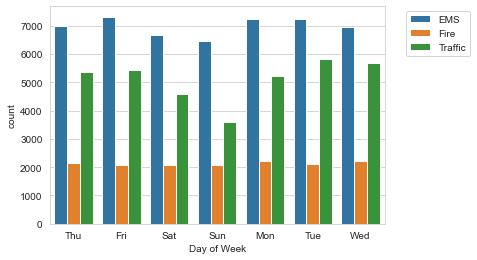

In [67]:
sns.countplot(x = 'Day of Week',hue = 'Reason',data = df)
plt.legend(bbox_to_anchor=(1.05,1))

<AxesSubplot:xlabel='Month', ylabel='count'>

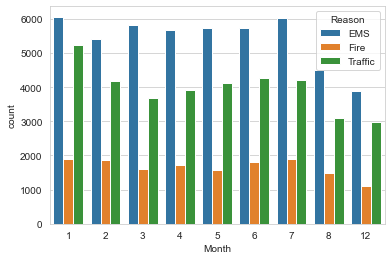

In [69]:
sns.countplot(x = 'Month',hue = 'Reason',data = df)

In [73]:
df.head()

,lat,lng,desc,zip,title,timeStamp,twp,addr,e,Reason,hour,month,Day of Week,Month
0,40.297876,-75.581294,REINDEER CT & DEAD END; NEW HANOVER; Station ...,19525.0,EMS: BACK PAINS/INJURY,2015-12-10 17:40:00,NEW HANOVER,REINDEER CT & DEAD END,1,EMS,17,12,Thu,12
1,40.258061,-75.264680,BRIAR PATH & WHITEMARSH LN; HATFIELD TOWNSHIP...,19446.0,EMS: DIABETIC EMERGENCY,2015-12-10 17:40:00,HATFIELD TOWNSHIP,BRIAR PATH & WHITEMARSH LN,1,EMS,17,12,Thu,12
2,40.121182,-75.351975,HAWS AVE; NORRISTOWN; 2015-12-10 @ 14:39:21-St...,19401.0,Fire: GAS-ODOR/LEAK,2015-12-10 17:40:00,NORRISTOWN,HAWS AVE,1,Fire,17,12,Thu,12
3,40.116153,-75.343513,AIRY ST & SWEDE ST; NORRISTOWN; Station 308A;...,19401.0,EMS: CARDIAC EMERGENCY,2015-12-10 17:40:01,NORRISTOWN,AIRY ST & SWEDE ST,1,EMS,17,12,Thu,12
4,40.251492,-75.603350,CHERRYWOOD CT & DEAD END; LOWER POTTSGROVE; S...,NaN,EMS: DIZZINESS,2015-12-10 17:40:01,LOWER POTTSGROVE,CHERRYWOOD CT & DEAD END,1,EMS,17,12,Thu,12


In [75]:
bymonth = df.groupby('Month').count()
bymonth.head()

,lat,lng,desc,zip,title,timeStamp,twp,addr,e,Reason,hour,month,Day of Week
Month,,,,,,,,,,,,,
1,13205,13205,13205,11527,13205,13205,13203,13096,13205,13205,13205,13205,13205
2,11467,11467,11467,9930,11467,11467,11465,11396,11467,11467,11467,11467,11467
3,11101,11101,11101,9755,11101,11101,11092,11059,11101,11101,11101,11101,11101
4,11326,11326,11326,9895,11326,11326,11323,11283,11326,11326,11326,11326,11326
5,11423,11423,11423,9946,11423,11423,11420,11378,11423,11423,11423,11423,11423


<AxesSubplot:xlabel='Month'>

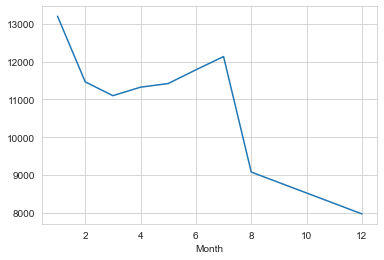

In [77]:
bymonth['lat'].plot()
#could be any column

In [78]:
bymonth.reset_index()

,Month,lat,lng,desc,zip,title,timeStamp,twp,addr,e,Reason,hour,month,Day of Week
0,1,13205,13205,13205,11527,13205,13205,13203,13096,13205,13205,13205,13205,13205
1,2,11467,11467,11467,9930,11467,11467,11465,11396,11467,11467,11467,11467,11467
2,3,11101,11101,11101,9755,11101,11101,11092,11059,11101,11101,11101,11101,11101
3,4,11326,11326,11326,9895,11326,11326,11323,11283,11326,11326,11326,11326,11326
4,5,11423,11423,11423,9946,11423,11423,11420,11378,11423,11423,11423,11423,11423
5,6,11786,11786,11786,10212,11786,11786,11777,11732,11786,11786,11786,11786,11786
6,7,12137,12137,12137,10633,12137,12137,12133,12088,12137,12137,12137,12137,12137
7,8,9078,9078,9078,7832,9078,9078,9073,9025,9078,9078,9078,9078,9078
8,12,7969,7969,7969,6907,7969,7969,7963,7916,7969,7969,7969,7969,7969


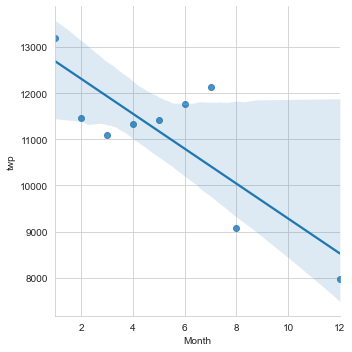

In [85]:
sns.lmplot(x = 'Month',y = 'twp',data = bymonth.reset_index())

In [86]:
df.head()

,lat,lng,desc,zip,title,timeStamp,twp,addr,e,Reason,hour,month,Day of Week,Month
0,40.297876,-75.581294,REINDEER CT & DEAD END; NEW HANOVER; Station ...,19525.0,EMS: BACK PAINS/INJURY,2015-12-10 17:40:00,NEW HANOVER,REINDEER CT & DEAD END,1,EMS,17,12,Thu,12
1,40.258061,-75.264680,BRIAR PATH & WHITEMARSH LN; HATFIELD TOWNSHIP...,19446.0,EMS: DIABETIC EMERGENCY,2015-12-10 17:40:00,HATFIELD TOWNSHIP,BRIAR PATH & WHITEMARSH LN,1,EMS,17,12,Thu,12
2,40.121182,-75.351975,HAWS AVE; NORRISTOWN; 2015-12-10 @ 14:39:21-St...,19401.0,Fire: GAS-ODOR/LEAK,2015-12-10 17:40:00,NORRISTOWN,HAWS AVE,1,Fire,17,12,Thu,12
3,40.116153,-75.343513,AIRY ST & SWEDE ST; NORRISTOWN; Station 308A;...,19401.0,EMS: CARDIAC EMERGENCY,2015-12-10 17:40:01,NORRISTOWN,AIRY ST & SWEDE ST,1,EMS,17,12,Thu,12
4,40.251492,-75.603350,CHERRYWOOD CT & DEAD END; LOWER POTTSGROVE; S...,NaN,EMS: DIZZINESS,2015-12-10 17:40:01,LOWER POTTSGROVE,CHERRYWOOD CT & DEAD END,1,EMS,17,12,Thu,12


In [94]:
df['Date'] = df['timeStamp'].apply(lambda time : time.date())
df['Date']

0        2015-12-10
1        2015-12-10
2        2015-12-10
3        2015-12-10
4        2015-12-10
            ...    
99487    2016-08-24
99488    2016-08-24
99489    2016-08-24
99490    2016-08-24
99491    2016-08-24
Name: Date, Length: 99492, dtype: object

<AxesSubplot:xlabel='Date'>

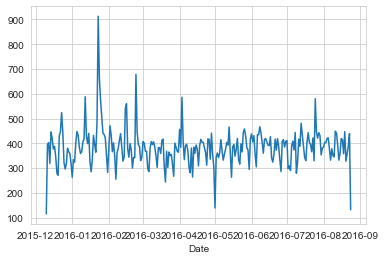

In [95]:
df.groupby('Date').count()['twp'].plot()

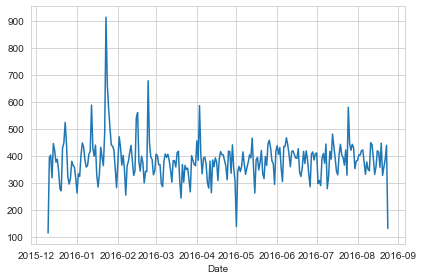

In [96]:
df.groupby('Date').count()['twp'].plot()
plt.tight_layout()

In [101]:
dayhour = df.groupby(by = ['Day of Week','hour']).count()['Reason'].unstack()
dayhour.head()

hour,0,1,2,3,4,5,6,7,8,9,...,14,15,16,17,18,19,20,21,22,23
Day of Week,,,,,,,,,,,,,,,,,,,,,
Fri,275,235,191,175,201,194,372,598,742,752,...,932,980,1039,980,820,696,667,559,514,474
Mon,282,221,201,194,204,267,397,653,819,786,...,869,913,989,997,885,746,613,497,472,325
Sat,375,301,263,260,224,231,257,391,459,640,...,789,796,848,757,778,696,628,572,506,467
Sun,383,306,286,268,242,240,300,402,483,620,...,684,691,663,714,670,655,537,461,415,330
Thu,278,202,233,159,182,203,362,570,777,828,...,876,969,935,1013,810,698,617,553,424,354


<AxesSubplot:xlabel='hour', ylabel='Day of Week'>

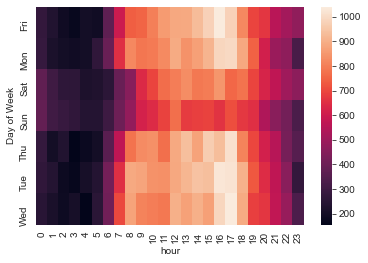

In [103]:
sns.heatmap(dayhour)

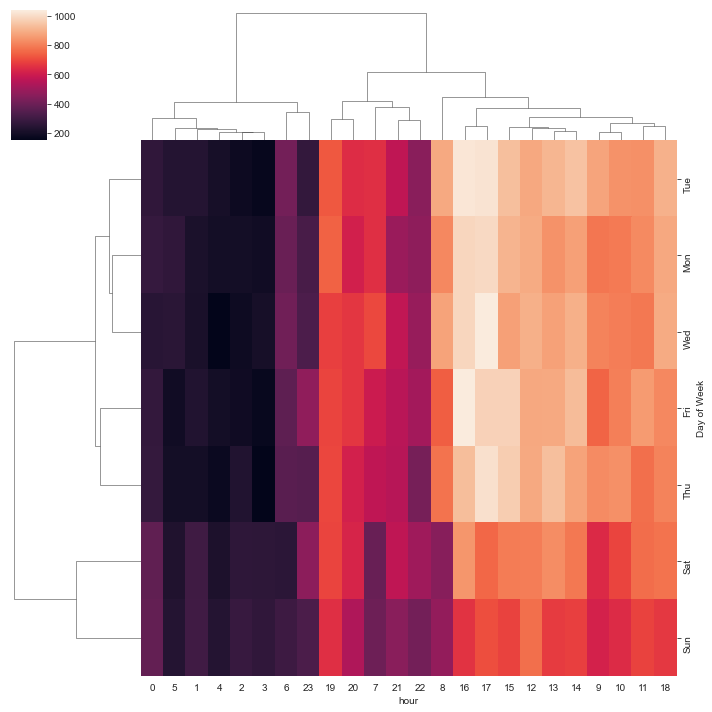

In [104]:
sns.clustermap(dayhour)